<a href="https://colab.research.google.com/github/PeterLiu97/BeeHouse/blob/master/%E2%80%9C1_explore_hw_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment: Exploratory data analysis
=====================================

**TODO**: Edit this cell to fill in your NYU Net ID and your name:

-   **Net ID**: yl7141
-   **Name**: Yiqun Liu

Introduction
------------

In this assignment, we will practice using exploratory data analysis on
Google’s COVID-19 Community Mobility data.

This data was collected from Google Maps users around the world over the
last few months - including you, *if* you have Google Maps on your phone
and have turned on the Location History setting. It combines location
history from a large number of users to capture the overall increase or
decrease in time spent in places such as: retail and recreation
facilities, groceries and pharmacies, parks, transit stations,
workplaces, and residences.

As you work through this notebook, you will see that some text and code
cells are marked with a “TODO” at the top. You’ll have to edit these
cells to fill in the code or answer the questions as indicated.

Learn about the data
--------------------

First, it is worthwhile to learn more about the data: how it is
collected, what is included, how Google gets consent to collect this
data, and how user privacy is protected. Google provides several
resources for learning about the data:

-   [Blog
    post](https://www.blog.google/technology/health/covid-19-community-mobility-reports?hl=en)
-   [About this
    data](https://www.google.com/covid19/mobility/data_documentation.html?hl=en#about-this-data)
-   [Understand the
    data](https://support.google.com/covid19-mobility/answer/9825414?hl=en&ref_topic=9822927)

Read in data
------------

Now you are ready to read the data into your notebook.

Visit Google’s web page for the [COVID-19 Community
Mobility](https://www.google.com/covid19/mobility/) project to get the
URL for the data.

(Specific instructions will depend on your browser and operating system,
but on my laptop, I can get the URL by right-clicking on the button that
says “Download global CSV” and choosing “Copy Link Address”.)

Then, in the following cells, use that URL to read the data into a
pandas Data Frame called `df`. (You can follow the example in the
“Exploratory data analysis” notebook from this week’s lesson.)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# TODO Q1
url='https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv?cachebust=3ec772aac6061acf'
df=pd.read_csv(url)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Use the `info()` and `head()` functions to show some basic information
about the data and to look at the first few samples.

In [3]:
# TODO Q2
# use info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547922 entries, 0 to 547921
Data columns (total 13 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   country_region_code                                 546981 non-null  object 
 1   country_region                                      547922 non-null  object 
 2   sub_region_1                                        531587 non-null  object 
 3   sub_region_2                                        316625 non-null  object 
 4   iso_3166_2_code                                     198752 non-null  object 
 5   census_fips_code                                    316746 non-null  float64
 6   date                                                547922 non-null  object 
 7   retail_and_recreation_percent_change_from_baseline  423131 non-null  float64
 8   grocery_and_pharmacy_percent_change_from_baseline   406061 non-n

In [4]:
# TODO Q3
# use head()
df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


Basic data manipulations
------------------------

The data includes a date field, but it may have been read in as a
string, rather than as a `datetime`. If that’s the case, use
`to_datetime()` to convert the field into a datetime format. (You can
follow the example in the “Exploratory data analysis” notebook from this
week’s lesson.)

Then, use `info()` again to make sure your change was applied. Note the
difference in the output, relative to the cell above.

In [5]:
# TODO Q4
# df['date'] = ...
df['date']=pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547922 entries, 0 to 547921
Data columns (total 13 columns):
 #   Column                                              Non-Null Count   Dtype         
---  ------                                              --------------   -----         
 0   country_region_code                                 546981 non-null  object        
 1   country_region                                      547922 non-null  object        
 2   sub_region_1                                        531587 non-null  object        
 3   sub_region_2                                        316625 non-null  object        
 4   iso_3166_2_code                                     198752 non-null  object        
 5   census_fips_code                                    316746 non-null  float64       
 6   date                                                547922 non-null  datetime64[ns]
 7   retail_and_recreation_percent_change_from_baseline  423131 non-null  float64       

Next, you are going to extract the subset of data for the location of
your choice. You can choose any location *except* Brooklyn, New York.
(You can’t choose Brooklyn because the example code I’m about to show
you is for Brooklyn.)

The data is reported for different regions, with different levels of
granularity available. This is best explained by example:

Suppose I want the overall trend from the entire U.S. I would use the
subset of data where `country_region` is equal to “United States” and
`sub_region_1` is null:

    df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].isnull())]

Suppose I want the overall trend from the entire state of New York: I
would use the subset of data where `country_region` is equal to “United
States”, `sub_region_1` is equal to “New York”, and `sub_region_2` is
null:

    df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].eq("New York")) & (df['sub_region_2'].isnull())]

Suppose I want the overall trend from Brooklyn, New York (Kings County):
I would use the subset of data where `country_region` is equal to
“United States”, `sub_region_1` is equal to “New York”, and
`sub_region_2` is equal to “Kings County”:

    df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].eq("New York")) & (df['sub_region_2'].eq("Kings County"))]

In the following cell(s), fill in the code to create a data frame
`df_subset` with data from a single location. You can go down to the
`sub_region_1` level or the `sub_region_2` level - depending on the
location you chose, the finer level of granularity may not be available.

In [6]:
# TODO Q5
# df_subset =
df_subset=df[(df['country_region'].eq("United States")) & (df['sub_region_1'].eq("New Jersey")) & (df['sub_region_2'].isnull())]

Is the data complete, or is some data not available for the location you
have chosen? In the following cell, write code to check for missing data
in the `...percent_change_from_baseline` fields.

In [7]:
# TODO Q6
# df_subset
df_subset.isnull().sum()

country_region_code                                     0
country_region                                          0
sub_region_1                                            0
sub_region_2                                          121
iso_3166_2_code                                         0
census_fips_code                                      121
date                                                    0
retail_and_recreation_percent_change_from_baseline      0
grocery_and_pharmacy_percent_change_from_baseline       0
parks_percent_change_from_baseline                      0
transit_stations_percent_change_from_baseline           0
workplaces_percent_change_from_baseline                 0
residential_percent_change_from_baseline                0
dtype: int64

**TODO** Q7: Edit this cell to answer the following question: Is the
data complete, or is some relevant data missing? Why would some
locations only have partial data available (missing some
`...percent_change_from_baseline` fields for some dates)? **Include a
short quote from the material you read in the “Learn about the data”
section to answer this question.**

**Q7 Answer:**
My data is totally complete. As for the reason why some locations only have partial data available, I quote a sentence as following from'https://support.google.com/covid19-mobility/answer/9825414?hl=en&ref_topic=9822927': "You might see data gaps for some categories in your region. These gaps are intentional and happen because the data doesn’t meet the quality and privacy threshold—when there isn’t enough data to ensure anonymity".

For this data, the `date` field is important, but we don’t necessarily
care about the absolute date. Instead, we care about how many days have
elapsed since the first confirmed case of COVID-19 in this location, how
many days have elapsed since a “stay at home” order or similar rule was
established in this location (if there was one) and how many days have
elapsed since it was lifted (if applicable).

For example, in Brooklyn, New York, I might compute:

    days_since_lockdown = (df_subset['date'] - pd.to_datetime('2020-03-20 00:00:00')).dt.days.values
    # NYC lockdown March 20, 2020 https://www.nytimes.com/2020/03/20/us/coronavirus-today.html

Compute “days since \[some relevant COVID-19 date\]” for your location.
In a comment, explain the significance of the date you have chosen, and
include a link to a news article or other reference supporting the
significance of the date. (The news article does not have to be in
English.)

In [8]:
# TODO Q8
# days_since...
days_since_lockdown=(df_subset['date']-pd.to_datetime('2020-03-21 00:00:00')).dt.days.values
# New Jersey March 21, 2020 https://www.njtvonline.org/news/uncategorized/tracking-the-coronavirus-in-new-jersey/ 
# Gov. Murphy signs an executive order requiring all New Jersey residents to “stay at home.”

Visualize data
--------------

Finally, we are going to visualize the changes in human mobility over
this time, for the location you have chosen.

In the following cell, create a figure with six subplots, arranged
vertically. (You can refer to the example in the “Python + numpy”
notebook from this week’s lesson.) On the horizontal axis, put the
`days_since...` array you computed in the previous cell. On the vertical
axes, show:

-   `retail_and_recreation_percent_change_from_baseline` in the top
    subplot
-   `grocery_and_pharmacy_percent_change_from_baseline` in the next
    subplot
-   `parks_percent_change_from_baseline` in the next subplot
-   `transit_stations_percent_change_from_baseline` in the next subplot
-   `workplaces_percent_change_from_baseline` in the next subplot
-   `residential_percent_change_from_baseline` in the bottom subplot

Text(0.5, 0, 'Days since lockdown')

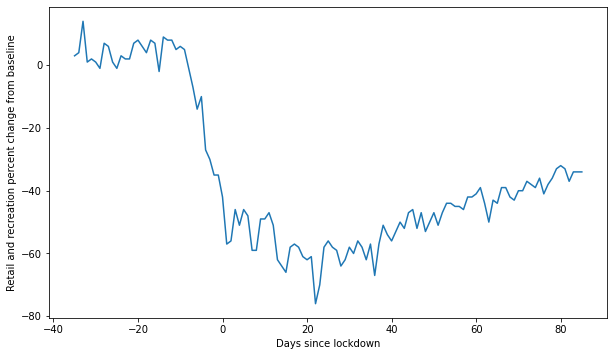

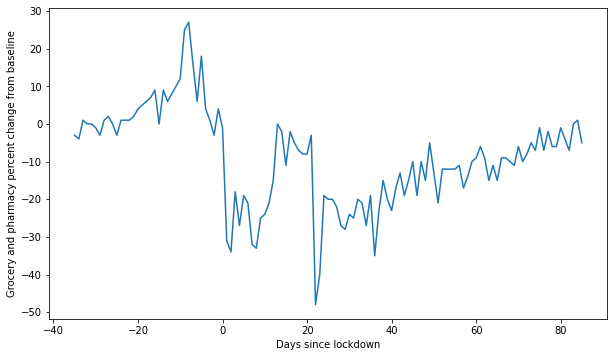

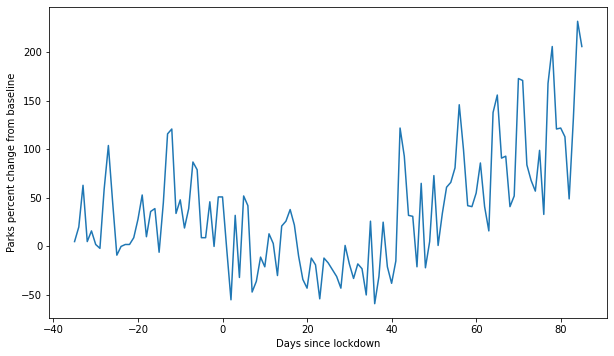

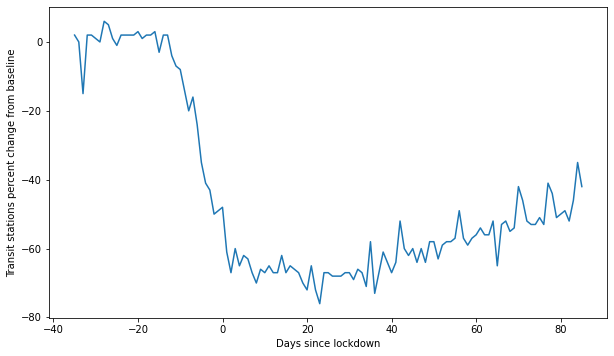

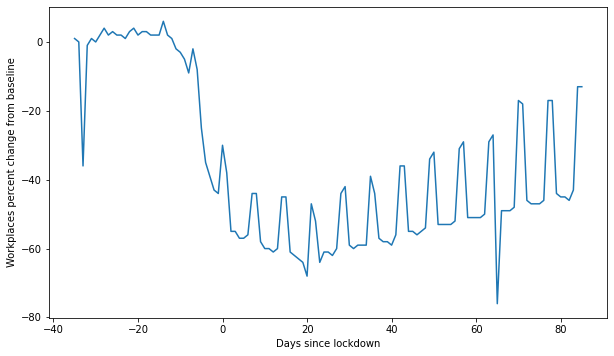

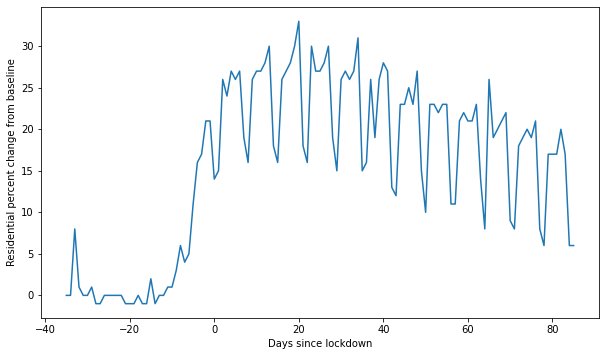

In [9]:
# TODO Q9
x=days_since_lockdown
y1=df_subset['retail_and_recreation_percent_change_from_baseline']
y2=df_subset['grocery_and_pharmacy_percent_change_from_baseline']
y3=df_subset['parks_percent_change_from_baseline']
y4=df_subset['transit_stations_percent_change_from_baseline']
y5=df_subset['workplaces_percent_change_from_baseline']
y6=df_subset['residential_percent_change_from_baseline']

plt.figure(figsize=(10, 40)) 
plt.subplot(611)
plt.plot(x,y1)
plt.ylabel('Retail and recreation percent change from baseline')
plt.xlabel('Days since lockdown')

plt.figure(figsize=(10, 40)) 
plt.subplot(612)
plt.plot(x,y2)
plt.ylabel('Grocery and pharmacy percent change from baseline')
plt.xlabel('Days since lockdown')

plt.figure(figsize=(10, 40)) 
plt.subplot(613)
plt.plot(x,y3)
plt.ylabel('Parks percent change from baseline')
plt.xlabel('Days since lockdown')

plt.figure(figsize=(10, 40)) 
plt.subplot(614)
plt.plot(x,y4)
plt.ylabel('Transit stations percent change from baseline')
plt.xlabel('Days since lockdown')

plt.figure(figsize=(10, 40)) 
plt.subplot(615)
plt.plot(x,y5)
plt.ylabel('Workplaces percent change from baseline')
plt.xlabel('Days since lockdown')

plt.figure(figsize=(10, 40)) 
plt.subplot(616)
plt.plot(x,y6)
plt.ylabel('Residential percent change from baseline')
plt.xlabel('Days since lockdown')

**TODO** Q10: Answer the following question: Do the results seem to
satisfy “common sense”? Explain, citing specific data from your plot to
support your answer.

**Q10 Answer:** Some of the results basically satisfy "common sense" but some  have abnormal data points and movements of curves. Let me explain the conclusion one by one. ***1.*** People would feel scared and stay at home early before the order is released when they  have seen strict quarantine policies issued at other states, so it's of no strange to see the retail and recreation percent drop repidly from 10 days before "stay at home" order is released. Yet there is an abnormal slight rebound in 5 days after the day of issuance of order, which is almost impossible since everyone should be asked to stay at home strictly. Then the percent tends to increase after the 38th day of policy release date， which might be because epidemic is gradually brought under control. ***2.*** There are two strange tendency of the plot: the grocery and pharmacy percent drop rapidly from 10 days before the order release date and there is a big bounce within 20 days after the date. Since the influence of COVID-19 is so obvious, it's reasonable for people to buy some life necessities and hoard some surgical masks. What's more, it's of no possibility for numerous citizens to walk out to buy food or masks under the quarantine. ***3.*** It's strange to see that there are at least 10 days in 40 days after the lockdown date when the parks percent is above the baseline. Because the majority of citizens have been ordered to stay at home, how it could be possible to see so many people play at parks during quarantine. ***4.*** The curve of the transit stations percent is reasonable. Realizing the severity of COVID-19, people choose to stay at home as much as possible before the lockdown date and they stay at home for 2 months and increase the numbers of trips gradually when the epidemic is improved by degrees. ***5***. Some employees are required to work online by government, like software engineerings, from 10 days before the lockdown date, thus the workplaces percent begins to decrease before the date. What's more, some extra volunteers and workers are recuited to build hospitals and serve the patients and they are required to take three days off a week uniformly, which causes the curve to increase and decrease periodically. ***6***. People would stay at home early due to the fear towards COVID-19 or because they have to take care of their children who must take online classes. Thus, the residential percent would increase from 10 days before the lockdown date. What's more, people are allowed to buy some life necessities once a week during the quarantine, so that's why the curve drops abruptly periodically in a week.      

**TODO** Q11: In the [Calibrate
Region](https://support.google.com/covid19-mobility/checklist/9834261?hl=en&ref_topic=9822927)
checklist, Google suggests a number of reasons why the data might *not*
be useful for understanding the effect of COVID-19-related lockdowns, or
why the data might be misleading. For the location you have chosen,
briefly answer all of the questions in that checklist. Based on your
answers, do you think there are any serious problems associated with
using this data for understanding user mobility changes due to COVID-19?

**Q11 Answer:** **1.** There is not anything significant happening between Jan 3 and Feb 6, 2020 except for the travel ban. **2**. There is not much change for the numbers of park visitors from January to March since the temperature changes not much. However, the temperature will increase after April, which arouses people's desire to have fun in the parks. **3.** Most people will spend 15 hours in their residential places. When COVID-19 happened, the nurse and police would have less time spending at home and students, which is the same as grocery-store workers and pharmacy workers, officer workers and so on would spend almost a day in their residential places. **4**. There is not much difference between weekend workers and weekday workers, since most of them are not required legally to go out to work or have fun in New Jersey no matter on weekdays or weekend. **5**. New Jersey has more than 50 resorts and 700 shopping malls, which are amazing numbers among all other states, and where are well represented by Google Maps.

Since New Jersey is a place full of resorts, people around the world would travel there to spend a nice vacation every year. However, the travel ban and lockdown order were issued respectively on Feb 5 and March 21, which would cause a lot of people couldn't go to New Jersey for a trip and we lose a lot of data points. What's more, there were a lot of students and tourists flying back to their own country before the order release date, which would contribute to the decrease of parks percent and grocery percent. 